<a href="https://colab.research.google.com/github/HamzaGbada/ML-Examples/blob/main/ML_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://machinelearningmastery.com/semi-supervised-learning-with-label-propagation/

https://www.kaggle.com/sz8416/6-ways-for-feature-selection

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/

https://towardsdatascience.com/support-vector-machine-python-example-d67d9b63f1c8

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/

https://machinelearningmastery.com/k-fold-cross-validation/

https://www.kaggle.com/cdeotte/modified-naive-bayes-santander-0-899


#Feature Selection and Feature Extraction

##Feature Selection

For feature selection we will use Univariate Statistical Tests

In [ ]:
import numpy as np
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Implementing SVM with Scikit-Learn


## Importing libraires




In [ ]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

## Prepare the dataset

In [ ]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Prepare our model and apply k-fold cross validation

In [ ]:
k = 5
kf = KFold(n_splits=k, random_state=None)
model_svm = SVC(kernel='linear')
acc_score = []
print(y_train.shape)
for train_index , test_index in kf.split(X_train):
    X_train_kf , X_test_kf = X_train[train_index,:],X_train[test_index,:]
    y_train_kf , y_test_kf = y_train[train_index] , y_train[test_index]
     
    model_svm.fit(X_train_kf,y_train_kf)
    pred_values = model_svm.predict(X_test_kf)
     
    acc = accuracy_score(pred_values , y_test_kf)
    acc_score.append(acc)

avg_acc_score = sum(acc_score)/k
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

(800,)
accuracy of each fold - [0.86875, 0.8625, 0.80625, 0.8375, 0.8375]
Avg accuracy : 0.8425


#K-mean Clustering

## Importing libraires

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification

Prepare the dataset

In [ ]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=1, n_classes=2)

define the model for clustring

In [ ]:
model_clustering = KMeans(n_clusters=2)
model_clustering.fit(X)
y_pred = model_clustering.predict(X)

Plot samples for each cluster

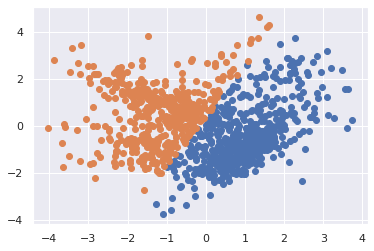

In [ ]:
clusters = np.unique(y_pred)
for i in clusters:
	index = np.where(y_pred == i)
	plt.scatter(X[index, 0], X[index, 1])
plt.show()

# Semi-Supervised Learning

## Importing libraries

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.semi_supervised import LabelPropagation

## Define a dataset for a semi-supervised classfication
We will define a dataset with two classes and split it equally. Then split train data into labeled and unlabeled.

In [ ]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1, stratify=y)
X_train_lab, X_train_unlab, y_train_lab, y_test_unlab = train_test_split(X_train, y_train, test_size=0.50, random_state=1, stratify=y_train)

Creating the training dataset input by concatenation of the labeled and unlabed data.

In [ ]:
X_train_mixed = np.concatenate((X_train_lab, X_train_unlab))

Create an non-label vector for unlabeled data.

In [ ]:
non_label = np.full(X_train_unlab.shape[0], -1)
non_label.shape

(250,)

Concatenate training dataset labels

In [ ]:
y_train_mixed = np.concatenate((y_train_lab, non_label))

## Labeling model definition

Define the model for label the unlabeled data using Label Propagation Model, and fit it on the mixed training data.

In [ ]:
labeling_model = LabelPropagation()
labeling_model.fit(X_train_mixed, y_train_mixed)

LabelPropagation(gamma=20, kernel='rbf', max_iter=1000, n_jobs=None,
                 n_neighbors=7, tol=0.001)

Get labels for entire training dataset data


In [ ]:
new_labels = labeling_model.transduction_
new_labels

(500,)

## Classification model definition

Define our supervised learning model (Logistic Regression) for the classification and train it on all the dataset using the new labels, then compute the accuraty of it on using our test data.

In [ ]:
model_class = LogisticRegression()
model.fit(X_train_mixed, new_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
score

0.862